In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Reshape, Input

In [42]:
#Багатошарова мережа
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
x_train = x_train / 255
x_test = x_test / 255

In [44]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [45]:
batch_size = 50

In [46]:
input = Input((28, 28, 1))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)

In [47]:
d = Dense(64, activation='relu')(encoded)
d = Dense(28 * 28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

In [48]:
autoencoder = keras.Model(input, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 5s 8ms/step - loss: 0.0528 - val_loss: 0.0311
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0272 - val_loss: 0.0239
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0225 - val_loss: 0.0207
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0201 - val_loss: 0.0185
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0182 - val_loss: 0.0170
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0169 - val_loss: 0.0159
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0158 - val_loss: 0.0149
Epoch 8/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0150 - val_loss: 0.0142
Epoch 9/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0143 - val_loss: 0.0136
Epoch 10/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0137 - val_loss: 0.0132

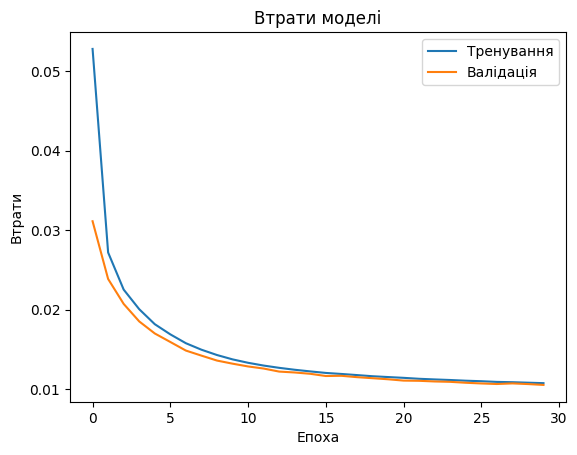

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Втрати моделі')
plt.ylabel('Втрати')
plt.xlabel('Епоха')
plt.legend(['Тренування', 'Валідація'], loc='upper right')
plt.show()

313/313 [==============================] - 1s 2ms/step


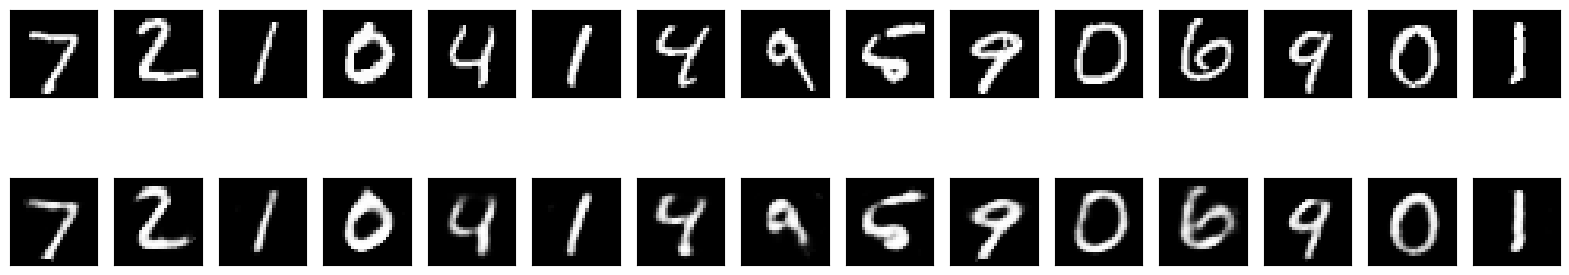

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Висновок: точність мережі висока, навчання швидке, швидкіть декодування середня.

In [12]:
#Згорткова модель
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [29]:
batch_size = 150

In [30]:
input_img = Input((28, 28, 1))
x = Flatten()(input_img)

In [32]:
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)
decoded = Dense(28 * 28, activation='sigmoid')(encoded)
decoded = Reshape((28, 28, 1))(decoded)

In [33]:
autoencoder = keras.Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/30
400/400 [==============================] - 5s 7ms/step - loss: 0.0534
Epoch 2/30
400/400 [==============================] - 5s 13ms/step - loss: 0.0252
Epoch 3/30
400/400 [==============================] - 3s 9ms/step - loss: 0.0201
Epoch 4/30
400/400 [==============================] - 4s 9ms/step - loss: 0.0176
Epoch 5/30
400/400 [==============================] - 5s 11ms/step - loss: 0.0158
Epoch 6/30
400/400 [==============================] - 3s 8ms/step - loss: 0.0146
Epoch 7/30
400/400 [==============================] - 4s 9ms/step - loss: 0.0137
Epoch 8/30
400/400 [==============================] - 4s 9ms/step - loss: 0.0130
Epoch 9/30
400/400 [==============================] - 4s 9ms/step - loss: 0.0124
Epoch 10/30
400/400 [==============================] - 3s 7ms/step - loss: 0.0119
Epoch 11/30
400/400 [==============================] - 3s 7ms/step - loss: 0.0115
Epoch 12/30
400/400 [==============================] - 3s 7ms/step - loss: 0.0112
Epoch 13/30
400/400 [==

In [35]:
n = 10
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

1/1 [==============================] - 0s 97ms/step


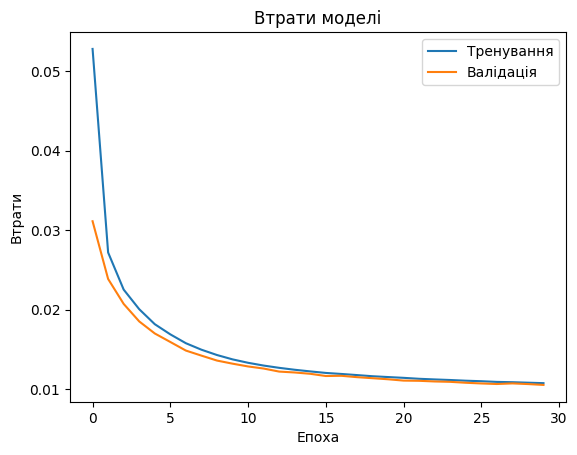

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Втрати моделі')
plt.ylabel('Втрати')
plt.xlabel('Епоха')
plt.legend(['Тренування', 'Валідація'], loc='upper right')
plt.show()

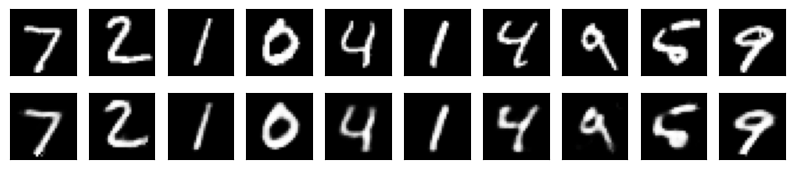

In [38]:
plt.figure(figsize=(n, 2))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

plt.show()

In [37]:
 #Висновок: точність мережі висока, навчання повільне, швидкіть декодування висока.